# Investigation into BAO damping

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


In [2]:
from halomod.wdm import HaloModelWDM
from scipy.interpolate import InterpolatedUnivariateSpline as spline

In [3]:
HaloModelWDM.rlog=False

In [4]:
c = HaloModelWDM(rmin=70.0,rmax=115.0,rnum=40.0,wdm_mass=10000.0,alter_dndm=None,filter="SharpK",hod_params={"alpha":1.1,"M_1":12.0})

In [5]:
w = HaloModelWDM(rmin=70.0,rmax=115.0,rnum=40.0,wdm_mass=2.00,alter_dndm=None,filter="SharpK",hod_params={"alpha":1.1,"M_1":12.0})

## Pure DM Correlations (Linear)

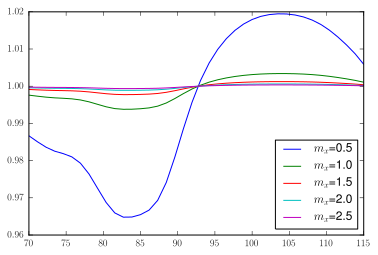

In [6]:
for m in np.arange(0.5,3.0,0.5):
    w.update(wdm_mass=m)
    plot(w.r,w.dm_corr/c.dm_corr,label=r"$m_x$=%s"%m)
    
legend(loc=0)

## Pure DM But higher redshifts (Linear)

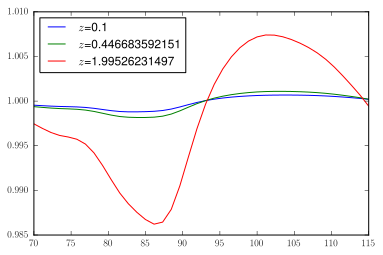

In [7]:
w.update(wdm_mass=2.0)
for z in np.logspace(-1,0.3,3):
    w.update(z=z)
    c.update(z=z)
    plot(w.r,w.dm_corr/c.dm_corr,label=r"$z$=%s"%z)
legend(loc=0)
w.update(z=0)
c.update(z=0)


## Non-Linear Galaxy Correlations (changing only m_x)

In [8]:
for m in np.arange(0.5,3.0,0.5):
    w.update(wdm_mass=m)
    #somehow normalise
    ratio = w.corr_gal_2h/c.corr_gal_2h
    ratio /= ratio[20]
    plot(w.r,ratio,label=r"$m_x$=%s"%m)
    
legend(loc=0)

AttributeError: 'module' object has no attribute 'Bullock'

## Contribution of Non-Linear modelling to shape of ratio

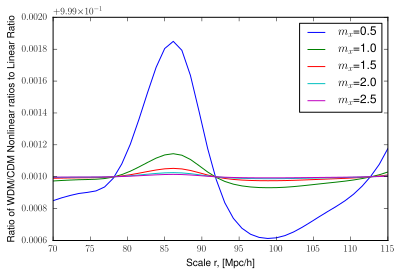

In [9]:
#Get where ratio is 1 for dm only
mask = np.logical_and(w.r>90.0,w.r<100.0)
ratio = (w.dm_corr/c.dm_corr)[mask]
linear = spline(ratio,w.r[mask])
eq_scale = linear(1.0)

for m in np.arange(0.5,3.0,0.5):
    w.update(wdm_mass=m)
    #somehow normalise
    ratio = w.corr_gal_2h/c.corr_gal_2h
    s = spline(w.r[mask],ratio[mask])
    ratio /= s(eq_scale)
    plot(w.r,ratio/(w.dm_corr/c.dm_corr),label=r"$m_x$=%s"%m)
    
legend(loc=0)
xlabel("Scale r, [Mpc/h]")
ylabel("Ratio of WDM/CDM Nonlinear ratios to Linear Ratio")
savefig("POW_plot.pdf")

## Non-Linear galaxy correlations (changing only HOD)

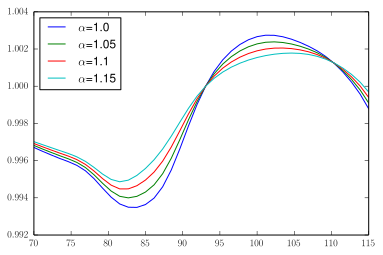

In [36]:
w.update(wdm_mass=1.0)
for alpha in np.arange(1.0,1.2,0.05):
    w.update(hod_params={"alpha":alpha})
    #somehow normalise
    ratio = w.corr_gal_2h/c.corr_gal_2h
    ratio /= ratio[20]
    plot(w.r,ratio,label=r"$\alpha$=%s"%alpha)
    
legend(loc=0)
w.update(hod_params={"alpha":1.1})

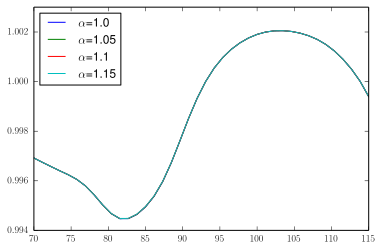

In [37]:
w.update(wdm_mass=1.0)
for alpha in np.arange(1.0,1.2,0.05):
    w.update(hod_params={"alpha":alpha})
    c.update(hod_params={"alpha":alpha})
    #somehow normalise
    ratio = w.corr_gal_2h/c.corr_gal_2h
    ratio /= ratio[20]
    plot(w.r,ratio,label=r"$\alpha$=%s"%alpha)
    
legend(loc=0)
w.update(hod_params={"alpha":1.1})
c.update(hod_params={"alpha":1.1})